In [46]:
import skewt as st
import skewt_moments as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from sklearn.metrics import mean_squared_error

In [176]:
v = np.linspace(-100.,100.,100)
w_true = 10.
v_c_true = 2.5
alpha_true = -1.
nu_true = 1.2

In [177]:
skewt_true = st.skewt_pdf(v, w_true, v_c_true, alpha_true, nu_true)

In [178]:
skewt_true.shape

(100,)

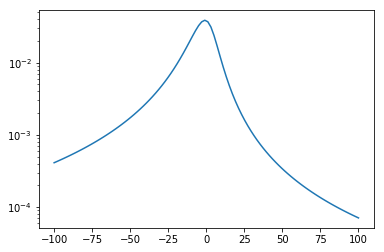

In [179]:
plt.semilogy(v, skewt_true)

In [180]:
true_mean = simps(skewt_true * v, v)
true_std = np.sqrt(simps(skewt_true * (v - true_mean)**2, v)) 
true_gamma1 = simps(skewt_true * (v - true_mean)**3, v)/true_std**3
true_gamma2 = simps(skewt_true * (v - true_mean)**4, v)/true_std**4 - 3.

In [189]:
v_c, w, alpha, nu = sm.moments2parameters(true_mean, true_std, true_gamma1, true_gamma2, p0 = (-1., 1.5))

/cosma/home/dp004/dc-cues1/CentralStreamingModel/skewt/skewt_moments.py:12: RuntimeWarning: invalid value encountered in double_scalars
  + 2*delta**2*b_dof**2) * (dof/(dof-2) - delta**2 * b_dof**2)**(-1.5)
/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/cosma/home/dp004/dc-cues1/CentralStreamingModel/skewt/skewt_moments.py:37: RuntimeWarning: invalid value encountered in sqrt
  w = std / np.sqrt( nu/(nu-2) - delta**2 * b**2)


In [190]:
print(f'V_c estimated: {v_c}, true: {v_c_true}')
print(f'W estimated: {w}, true: {w_true}')
print(f'alpha estimated: {alpha}, true: {alpha_true}')
print(f'nu estimated: {nu}, true: {nu_true}')

V_c estimated: nan, true: 2.5
W estimated: nan, true: 10.0
alpha estimated: -1.0, true: -1.0
nu estimated: 1.5, true: 1.2


In [174]:
skewt_estimated = st.skewt_pdf(v, w, v_c, alpha, nu)

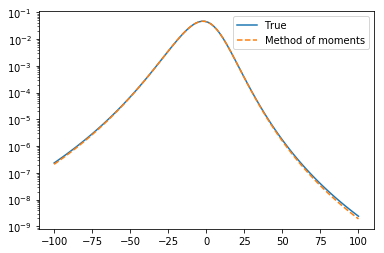

In [175]:
plt.semilogy(v, skewt_true, label = 'True')
plt.semilogy(v, skewt_estimated,
             label = 'Method of moments', linestyle='dashed')
plt.legend()

In [43]:
mean_from_parameters, std_from_parameters, gamma1_from_parameters, gamma2_from_parameters \
            = sm.parameters2moments(v_c_true, w_true, alpha_true, nu_true)

In [44]:
print(f'Mean estimated: {mean_from_parameters}, true: {true_mean}')
print(f'Std estimated: {std_from_parameters}, true: {true_std}')
print(f'Gamma1 estimated: {gamma1_from_parameters}, true: {true_gamma1}')
print(f'Gamma2 estimated: {gamma2_from_parameters}, true: {true_gamma2}')

Mean estimated: -4.860716868696261, true: -4.735495782516486
Std estimated: 13.384811560579537, true: 12.50409248563591
Gamma1 estimated: -3.5557154249876306, true: -1.1103834320462502
Gamma2 estimated: -27.994353492881128, true: 5.656962626187823


In [137]:
nu_true = np.linspace(3.1, 10., 20)

error_mean, error_std, error_gamma1, error_gamma2 = [], [], [], []
for nu in nu_true:
    skewt_true = st.skewt_pdf(v, w_true, v_c_true, alpha_true, nu)
    
    true_mean = simps(skewt_true * v, v)
    true_std = np.sqrt(simps(skewt_true * (v - true_mean)**2, v)) 
    true_gamma1 = simps(skewt_true * (v - true_mean)**3, v)/true_std**3
    true_gamma2 = simps(skewt_true * (v - true_mean)**4, v)/true_std**4 - 3.   
    
    v_c_estimated, w_estimated, alpha_estimated, nu_estimated = sm.moments2parameters(true_mean,
                                true_std, true_gamma1, true_gamma2)
    
    skewt_estimated = st.skewt_pdf(v, w_estimated, v_c_estimated, alpha_estimated, nu_estimated)
    
    
    estimated_mean = simps(skewt_estimated * v, v)
    estimated_std = np.sqrt(simps(skewt_estimated * (v - estimated_mean)**2, v)) 
    estimated_gamma1 = simps(skewt_estimated * (v - estimated_mean)**3, v)/estimated_std**3
    estimated_gamma2 = simps(skewt_estimated * (v - estimated_mean)**4, v)/estimated_std**4 - 3.  
    
    error_mean.append(mean_squared_error([true_mean], [estimated_mean]))
    error_std.append(mean_squared_error([true_std], [estimated_std]))
    error_gamma1.append(mean_squared_error([true_gamma1], [estimated_gamma1]))
    error_gamma2.append(mean_squared_error([true_gamma2], [estimated_gamma2]))


Text(0.5,0,'$\\nu_{true}$')

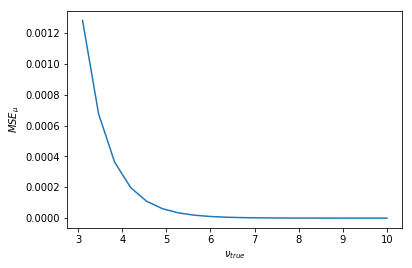

In [138]:
plt.plot(nu_true, error_mean)
plt.ylabel(r'$MSE_\mu$')
plt.xlabel(r'$\nu_{true}$')

Text(0.5,0,'$\\nu_{true}$')

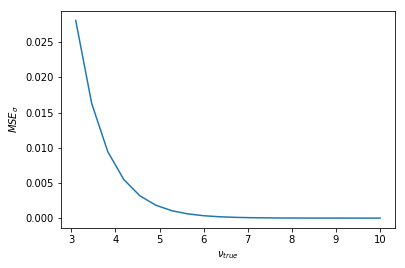

In [139]:
plt.plot(nu_true, error_std)
plt.ylabel(r'$MSE_{\sigma}$')
plt.xlabel(r'$\nu_{true}$')

Text(0.5,0,'$\\nu_{true}$')

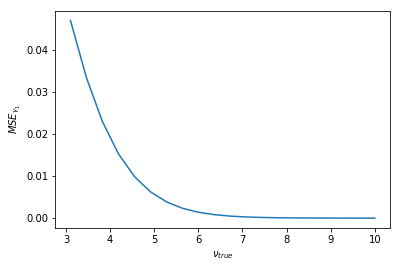

In [140]:
plt.plot(nu_true, error_gamma1)
plt.ylabel(r'$MSE_{\gamma_1}$')
plt.xlabel(r'$\nu_{true}$')

Text(0.5,0,'$\\nu_{true}$')

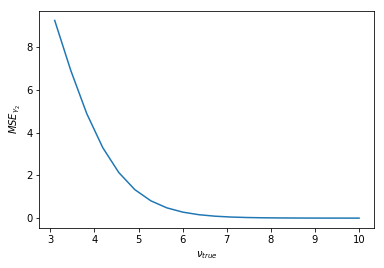

In [141]:
plt.plot(nu_true, error_gamma2)
plt.ylabel(r'$MSE_{\gamma_2}$')
plt.xlabel(r'$\nu_{true}$')